<a href="https://colab.research.google.com/github/lmarieta/FaceRecognition/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries


In [3]:
import numpy as np
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
#from sklearn import train_test_split
import matplotlib.pyplot as plt
!pip install pyreadr
import pyreadr

Test example

In [4]:
"""
# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output data
y = np.array([[0], [1], [1], [0]])

# Neural network
model = keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=1000, batch_size=4)

# Test data
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Predictions
predictions = model.predict(X_test)

# Plot the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions.flatten(), cmap='viridis')
plt.title('Predictions')
plt.xlabel('Xtest1')
plt.ylabel('Xtest2')
plt.colorbar()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
plt.title('y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()
"""

"\n# Input data\nX = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])\n\n# Output data\ny = np.array([[0], [1], [1], [0]])\n\n# Neural network\nmodel = keras.Sequential()\nmodel.add(layers.Dense(4, activation='relu', input_shape=(2,)))\nmodel.add(layers.Dense(1, activation='sigmoid'))\n\n# Compile model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n# Train model\nmodel.fit(X, y, epochs=1000, batch_size=4)\n\n# Test data\nX_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])\n\n# Predictions\npredictions = model.predict(X_test)\n\n# Plot the results\nplt.scatter(X_test[:, 0], X_test[:, 1], c=predictions.flatten(), cmap='viridis')\nplt.title('Predictions')\nplt.xlabel('Xtest1')\nplt.ylabel('Xtest2')\nplt.colorbar()\nplt.show()\n\nplt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')\nplt.title('y')\nplt.xlabel('X1')\nplt.ylabel('X2')\nplt.colorbar()\nplt.show()\n"

Load data

In [6]:
filename = '/content/data.Rd'
df = pyreadr.read_r(filename)
# Some checks
print(df['d.train'].columns)
print(df['d.test'].columns)
print(df['d.train'].count())
print(df['d.test'].count())
print(df['im.train'].head())
print(df['im.test'].head())
print(df['d.train'].shape)
print(df['d.test'].shape)
print(df['im.train'].shape)
print(df['im.test'].shape)
x_train = df['im.train']
y_train = df['d.train']
x_test = df['im.test']
y_test = df['d.test']
# Get the indices of rows containing NaN values. Note that train and test splits are random with a given seed.
nan_indices_train = x_train.index[x_train.isnull().any(axis=1)].tolist() + y_train.index[y_train.isnull().any(axis=1)].tolist()
nan_indices_test = x_test.index[x_test.isnull().any(axis=1)].tolist() + y_test.index[y_test.isnull().any(axis=1)].tolist()

# Drop rows containing NaN values
x_train = x_train.drop(x_train.index[nan_indices_train])
y_train = y_train.drop(y_train.index[nan_indices_train])
x_test = x_test.drop(x_test.index[nan_indices_test])
y_test = y_test.drop(y_test.index[nan_indices_test])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inn

Single layer model

In [ ]:
# Define the model
pixel_num = x_train.shape[1]
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(pixel_num,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y_train.shape[1])  # Output layer with 2 units per keypoint (x and y coordinates)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=400, batch_size=32)

# Make predictions
predictions = model.predict(x_test)

In [8]:
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
rmse

left_eye_center_x            11.419501
left_eye_center_y             6.390877
right_eye_center_x            5.096177
right_eye_center_y            6.081428
left_eye_inner_corner_x      10.236564
left_eye_inner_corner_y       6.384052
left_eye_outer_corner_x      12.540712
left_eye_outer_corner_y       6.821938
right_eye_inner_corner_x      6.051410
right_eye_inner_corner_y      6.113897
right_eye_outer_corner_x      4.403216
right_eye_outer_corner_y      6.276098
left_eyebrow_inner_end_x     10.093143
left_eyebrow_inner_end_y      5.084200
left_eyebrow_outer_end_x     13.691053
left_eyebrow_outer_end_y      5.994511
right_eyebrow_inner_end_x     6.888193
right_eyebrow_inner_end_y     4.809349
right_eyebrow_outer_end_x     4.010386
right_eyebrow_outer_end_y     5.438498
nose_tip_x                    8.221291
nose_tip_y                    9.874746
mouth_left_corner_x          10.564351
mouth_left_corner_y          13.399257
mouth_right_corner_x          5.813063
mouth_right_corner_y     

In [14]:
df_predictions = pd.DataFrame(predictions)

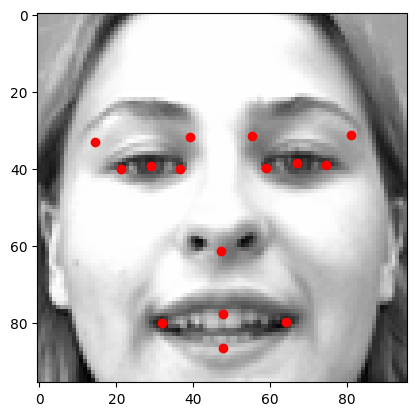

In [24]:
# Plot the first image in the DataFrame
image = np.array(x_test.iloc[1,:])  # Convert the Series to a NumPy array
image = image.reshape((96, 96))  # Reshape the array to the desired image dimensions
predicted_keypoints = predictions[1].reshape((15, 2))
plt.scatter(predicted_keypoints[:, 0], predicted_keypoints[:, 1], c='r', marker='o')
plt.imshow(image, cmap='gray')
plt.show()

0       147
1       148
2       160
3       196
4       215
       ... 
9211     46
9212     83
9213    140
9214    170
9215    176
Name: result.5, Length: 9216, dtype: int32